<a href="https://colab.research.google.com/github/svfrolov/YP-project/blob/main/%E2%84%962_%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

Исследование объявлений о продаже квартир
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

real_estate_data.csv - данные, которые имеют следующие столбцы:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## План выполнениея проекта

1. Провести поиск аномалий среди пропусков.
2. Разработать стратегию замены пустых значений.
3. Поиск несоотвествущих реальности значений или требованиям государства.
4. Приведение к нужному типу данных.
5. Дополнение дата фрейма столбцами на основе других столбцов
6. Проведение исследований и ответы на вопросы
7. Оформление и заключительный вывод.

### Откроем файл с данными и изучим общую информацию. 

In [ ]:
import pandas as pd; pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter("ignore")

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [ ]:
data.head(10).sort_values('total_images')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0


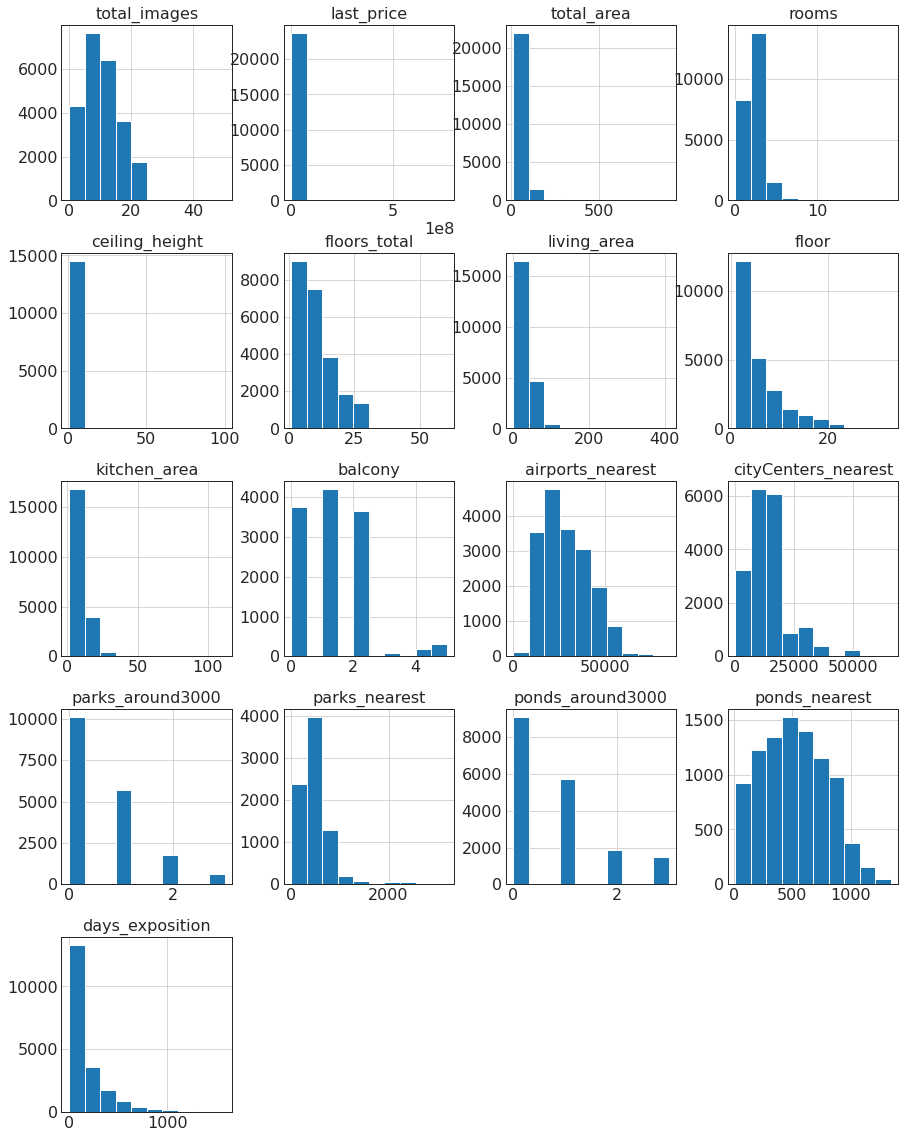

In [ ]:
data.hist(figsize=(15, 20));

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
pd.pivot_table(data,
               index=["ceiling_height"], values=["living_area"]).sort_values(by='living_area', ascending = False)

,living_area
ceiling_height,
4.65,347.50
4.45,236.15
5.30,190.00
3.82,188.70
3.86,187.25
...,...
8.30,19.30
2.20,18.00
1.75,17.40


### Предобработка данных

**Итог:**

**Диапазон: от 0 до 23698** \
**Всего записей: - 23699**

0   *total_images          23699 non-null  int64* **- норм**

1   last_price            23699 non-null  float64 **- норм и заменим на int (целое число)**

2   total_area            23699 non-null  float64 **- норм**

3   first_day_exposition  23699 non-null  object **- норм, заменить тип**

4   rooms                 23699 non-null  int64 **- норм**

5   ceiling_height        14504 non-null  float64 **- много пропусков, высоту потолков лучше в см, умножим на 100 и заполним наиболее частыми значениями и заменим на int (целое число)**

6   floors_total          23613 non-null  float64 **- немного пропусков, проанализируем и с floor и заменим на int (целое число)**

7   living_area           21796 non-null  float64 **- много пропуско (проанализируем)**

8   floor                 23699 non-null  int64 **- норм**

9   is_apartment          2775 non-null   object **- проверим пропуски (проанализируем) и заменим на bool (логический тип)**

10  studio                23699 non-null  bool **- норм**

11  open_plan             23699 non-null  bool **- норм**

12  kitchen_area          21421 non-null  float64 **- много пропусков (проанализируем)**

13  balcony               12180 non-null  float64 **- много пропусков, возможно их просто нет, заменим на = 0**

14  locality_name         23650 non-null  object **- **-немного пропусков, норм**

15  airports_nearest      18157 non-null  float64 **- заменим на int (целое число) и (проанализируем)**

16  cityCenters_nearest   18180 non-null  float64 **- много пропусков (проанализируем) и заменим на int (целое число)**

17  parks_around3000      18181 non-null  float64 **- заменим на int (целое число)**

18  parks_nearest         8079 non-null   float64 **- заменим на int (целое число)**

19  ponds_around3000      18181 non-null  float64 **- заменим на int (целое число)**

20  ponds_nearest         9110 non-null   float64 **- заменим на int (целое число)**

21  days_exposition       20518 non-null  float64 **- заменим на int (целое число) и (проанализируем)**

# №0 total_images  #
**23699 = 23699** non-null  float64 **- корректно**

In [ ]:
data['total_images'].value_counts(ascending = False)

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

<AxesSubplot:>

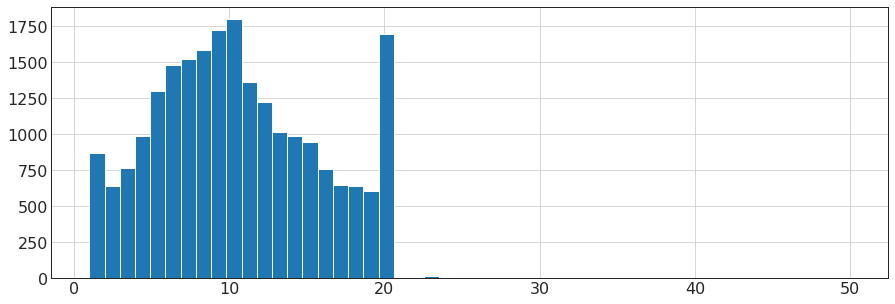

In [ ]:
data['total_images'] .hist(bins=50, range=(1, 50), figsize =(15, 5))

# №1   last_price #
**23699 = 23699** non-null  float64 **- норм и заменим на int (целое число)****

In [ ]:
def to_numeric(s_col):
    data[s_col].head(10), data[s_col].describe()
    data.boxplot(column=s_col, figsize =(15, 7));
    plt.show()
    data[s_col].hist(figsize =(15, 10), bins=100);

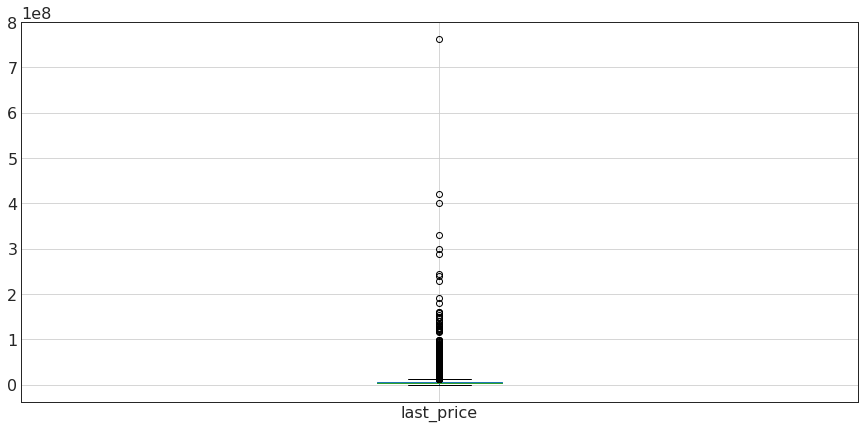

0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
5     2890000.0
6     3700000.0
7     7915000.0
8     2900000.0
9     5400000.0
Name: last_price, dtype: float64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


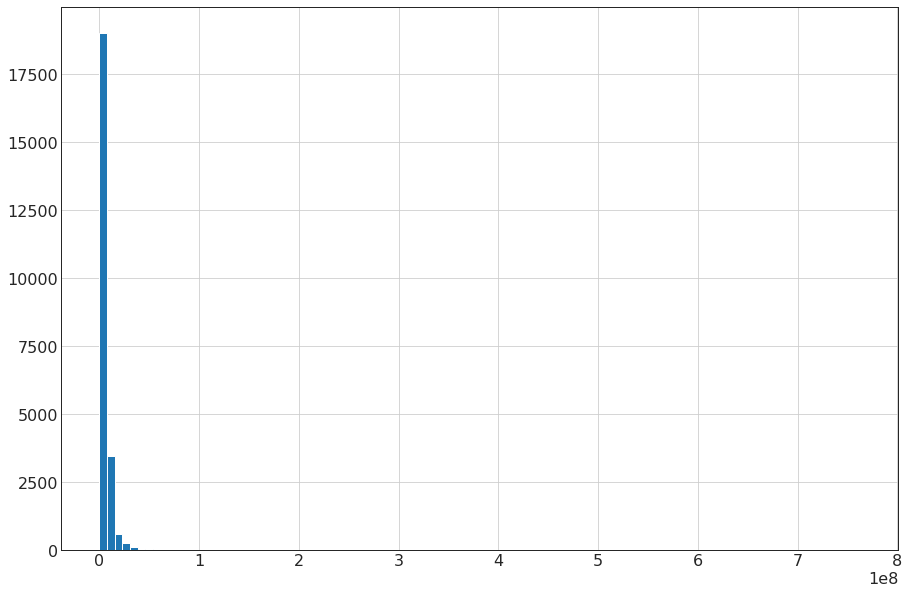

In [ ]:
to_numeric('last_price')
print(data['last_price'].head(10))
print(data['last_price'].describe())

In [ ]:
data['last_price'] = data['last_price'].astype(int)
print(data['last_price'].head(10))
print(data['last_price'].describe())

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
5     2890000
6     3700000
7     7915000
8     2900000
9     5400000
Name: last_price, dtype: int64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


**Есть как очень маленькие от 12 190, так и большие 763 000 000**

In [ ]:
data = data.query('400000 < last_price < 100000000')
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['last_price'].describe())

RangeIndex(start=0, stop=23661, step=1)
count    2.366100e+04
mean     6.251771e+06
std      6.424397e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.635000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64


**Удалили нереально низкие и высокие**

# №2 total_area #
**23699=23699** non-null float64 - **норм**

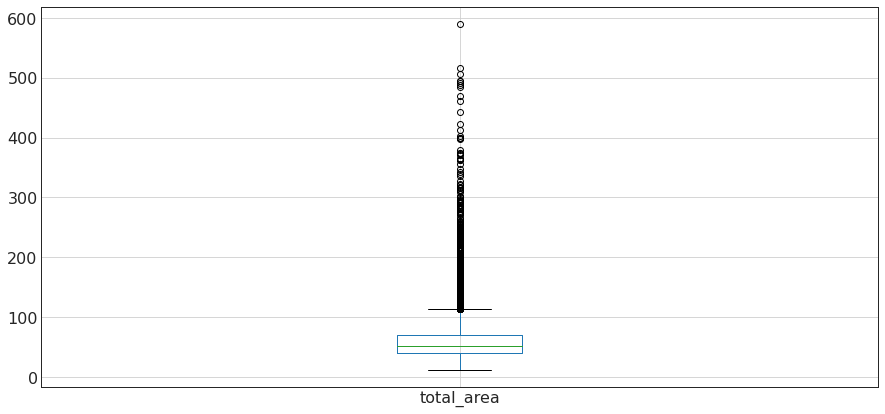

0    108.00
1     40.40
2     56.00
3    159.00
4    100.00
5     30.40
6     37.30
7     71.60
8     33.16
9     61.00
Name: total_area, dtype: float64
count    23661.000000
mean        59.925974
std         33.470704
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64


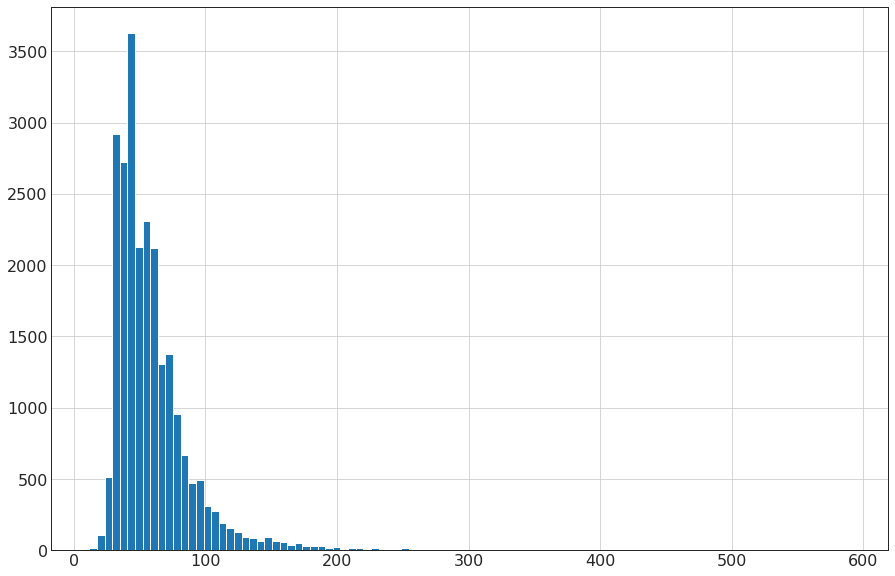

In [ ]:
to_numeric('total_area')
print(data['total_area'].head(10))
print(data['total_area'].describe())

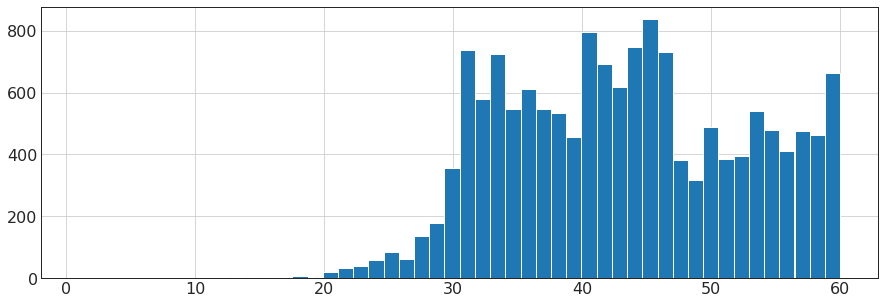

In [ ]:
data['total_area'].hist(bins=50, range=(1, 60), figsize =(15, 5));

**Есть маленькие по 12 и большие 590**

In [ ]:
data = data.query('10 < total_area < 400')
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['total_area'].describe())

RangeIndex(start=0, stop=23645, step=1)
count    23645.000000
mean        59.650315
std         31.732379
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        399.000000
Name: total_area, dtype: float64


# №3  first_day_exposition #
23699 = 23699 non-null object - **норм, заменить тип**

In [ ]:
print(data['first_day_exposition'].head(10))
print(data['first_day_exposition'].describe())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object
count                   23645
unique                   1490
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.describe(datetime_is_numeric=True)
print(data['first_day_exposition'].head(10))
print(data['first_day_exposition'].describe())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]
count                   23645
unique                   1490
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object


**столб с датой поправили**

# №4  rooms #
23699 = 23699 non-null int64 - **нормальные значения, проверим детальнее**

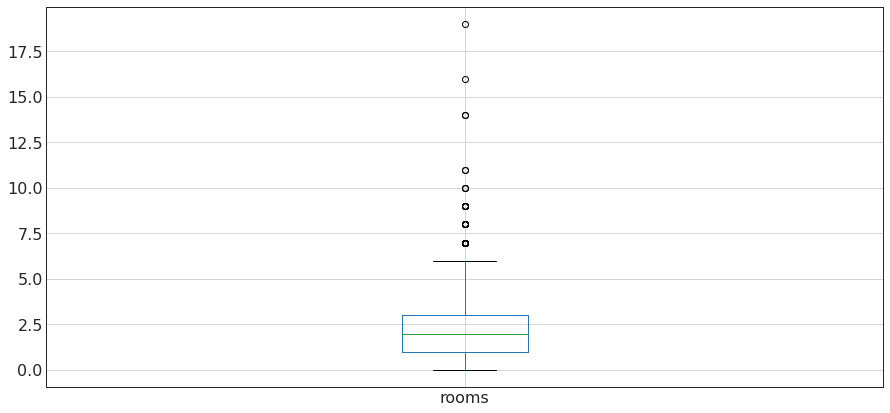

1     8046
2     7938
3     5810
4     1169
5      312
0      197
6       98
7       49
8       10
9        7
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64


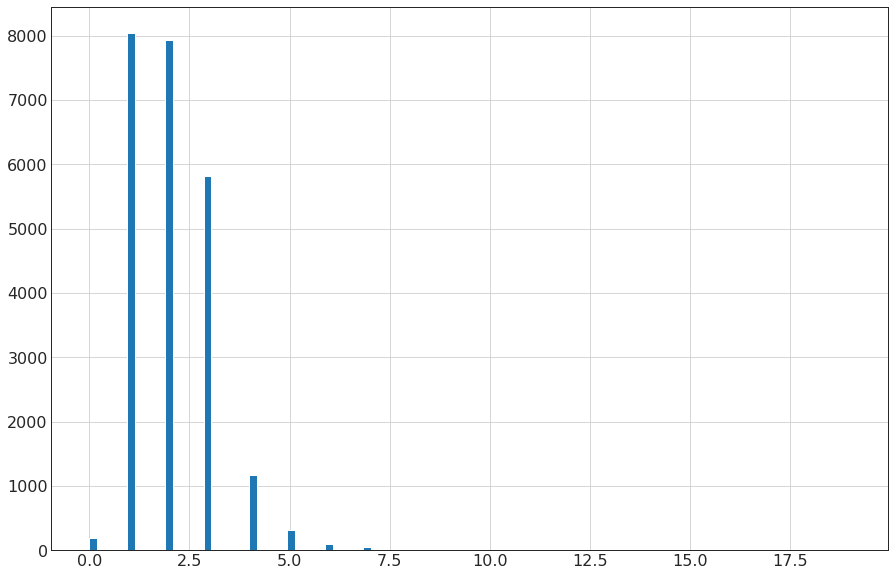

In [ ]:
to_numeric('rooms')
print(data['rooms'].value_counts())

In [ ]:
print(data['rooms'].head(10))
print(data['rooms'].describe())

0    3
1    1
2    2
3    3
4    2
5    1
6    1
7    2
8    1
9    3
Name: rooms, dtype: int64
count    23645.000000
mean         2.062889
std          1.061816
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [ ]:
print(data.query('rooms == 0')['total_area'].describe())

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64


**197 шт без комнат**
**Есть 0-нулевые значения** - видимо студии

In [ ]:
print("Кол-во строк перед удалением", data.shape, len(data))
data.drop(data.loc[(data['rooms'] >= 6)].index,inplace=True, axis=0)
print("Кол-во строк после удаления", data.shape, len(data))

Кол-во строк перед удалением (23645, 22) 23645
Кол-во строк после удаления (23472, 22) 23472


In [ ]:
print(data['rooms'].head(10))
print(data['rooms'].describe())

0    3
1    1
2    2
3    3
4    2
5    1
6    1
7    2
8    1
9    3
Name: rooms, dtype: int64
count    23472.000000
mean         2.027437
std          0.970581
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


# №5  ceiling_height #
23699 > 14504 non-null float64 - **много пропусков, высоту потолков лучше в см, умножим на 100 и заполним наиболее частыми значениями и заменим на int (целое число)**

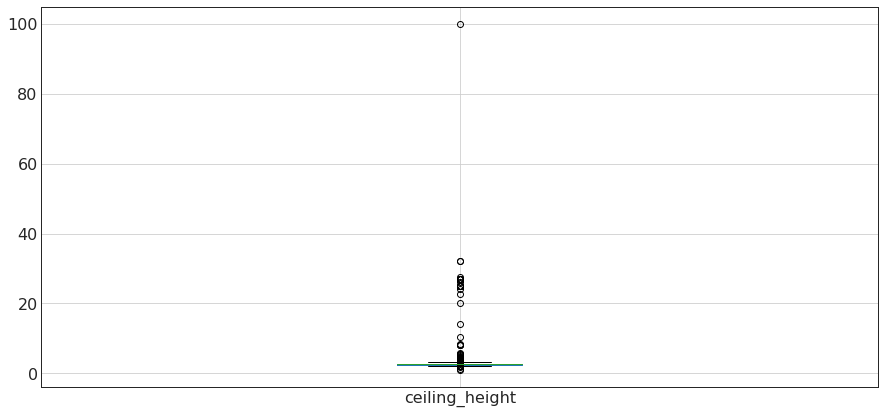

2.50     3513
2.60     1644
2.70     1570
3.00     1093
2.80      990
         ... 
3.86        1
3.48        1
4.80        1
10.30       1
3.76        1
Name: ceiling_height, Length: 175, dtype: int64


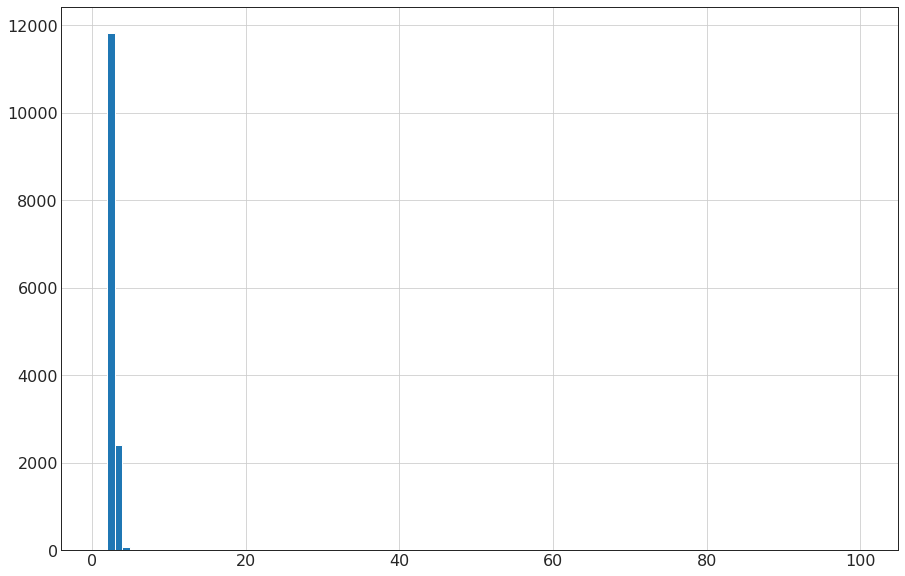

In [ ]:
to_numeric('ceiling_height')
print(data['ceiling_height'].value_counts())

In [ ]:
print(data['ceiling_height'].head(10))
print(data['ceiling_height'].describe())

0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
5     NaN
6     NaN
7     NaN
8     NaN
9    2.50
Name: ceiling_height, dtype: float64
count    14343.000000
mean         2.764991
std          1.265382
min          1.000000
25%          2.505000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


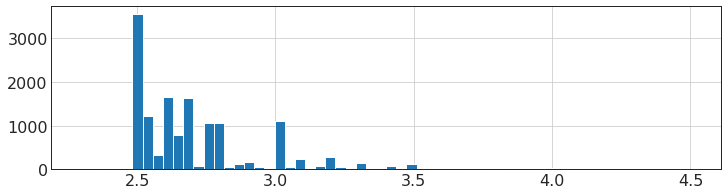

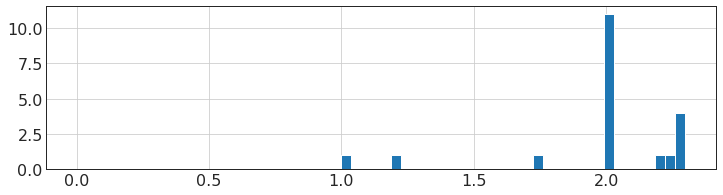

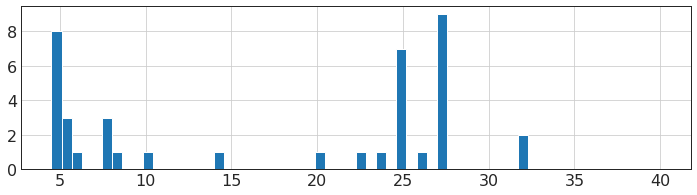

In [ ]:
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(2.3, 4.5));
plt.show()
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(0,2.3));
plt.show()
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(4.5,40));

**мин 1м, макс 100м - до 1,9 м скорее подвалы, свыше 5 м скорее или пропущенная запятая или многоуровневые**

In [ ]:
index_list = data.query('ceiling_height > 19 and ceiling_height < 35').index
data.loc[index_list, 'ceiling_height'] = data.loc[index_list, 'ceiling_height'] / 10

In [ ]:
print(data.loc[index_list]['ceiling_height'])
print(data['ceiling_height'].tail(10))

355      2.50
3138     3.20
4631     2.50
4864     2.70
5063     2.40
5233     2.70
5655     2.60
5793     2.70
6229     2.50
9355     2.50
10748    2.70
11260    2.50
14350    2.50
17456    2.00
17817    2.70
18504    2.50
20431    2.70
20460    2.26
21329    2.75
21776    2.70
22284    3.20
22884    2.70
Name: ceiling_height, dtype: float64
23635    2.86
23636     NaN
23637    2.75
23638     NaN
23639    2.60
23640    3.70
23641     NaN
23642     NaN
23643    3.00
23644    2.50
Name: ceiling_height, dtype: float64


In [ ]:
index_list = data.query('ceiling_height>35 or ceiling_height<1.9 or 7<ceiling_height<19').index
print(data.loc[index_list, 'ceiling_height'])

3464       8.00
5698       1.20
5849       8.30
15026     14.00
15706      8.00
16894      1.75
17402      8.00
22257     10.30
22537      1.00
22815    100.00
Name: ceiling_height, dtype: float64


In [ ]:
print("Кол-во строк перед удалением", len(data))
data.drop(index_list, inplace=True, axis=0)
print("Кол-во строк после удаления", len(data))

Кол-во строк перед удалением 23472
Кол-во строк после удаления 23462


In [ ]:
print(data['ceiling_height'].describe())

count    14333.000000
mean         2.719607
std          0.266472
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64


In [ ]:
data.reset_index(inplace=True, drop=True)
display(data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23457,9,9700000,133.81,2017-03-21,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23458,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23459,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23460,13,11475000,76.75,2017-03-28,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23461,4,1350000,32.30,2017-07-21,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Переведем в сантиметры для удобства**

In [ ]:
data['ceiling_height'] = data['ceiling_height'] * 100
print(data['ceiling_height'].describe())

count    14333.000000
mean       271.960650
std         26.647228
min        200.000000
25%        250.000000
50%        265.000000
75%        280.000000
max        580.000000
Name: ceiling_height, dtype: float64


**Смотрим пропуски**

In [ ]:
print("Итого пропусков =", data['ceiling_height'].isna().sum())
print(data['ceiling_height'].describe())
print(data['ceiling_height'].value_counts())

Итого пропусков = 9129
count    14333.000000
mean       271.960650
std         26.647228
min        200.000000
25%        250.000000
50%        265.000000
75%        280.000000
max        580.000000
Name: ceiling_height, dtype: float64
250.0    3520
260.0    1645
270.0    1578
300.0    1093
280.0     990
         ... 
299.0       1
226.0       1
383.0       1
342.0       1
358.0       1
Name: ceiling_height, Length: 160, dtype: int64


**Для замены берем медиану 265** она не берет значения концов

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(265)

In [ ]:
print("Итого пропусков =", data['ceiling_height'].isna().sum())
print()
print()
print(data['ceiling_height'].describe())

Итого пропусков = 0


count    23462.000000
mean       269.252280
std         21.101945
min        200.000000
25%        260.000000
50%        265.000000
75%        270.000000
max        580.000000
Name: ceiling_height, dtype: float64


**Меняем на int**

In [ ]:
data['ceiling_height'] = data['ceiling_height'].astype(int)

In [ ]:
print(data['ceiling_height'].describe())
print()
print()
print("Тип столбца -",data['ceiling_height'].dtype)

count    23462.000000
mean       269.205865
std         21.133503
min        200.000000
25%        260.000000
50%        265.000000
75%        270.000000
max        580.000000
Name: ceiling_height, dtype: float64


Тип столбца - int64


# №13  balcony #
12180 non-null  float64 **- много пропусков, возможно их просто нет, проверим и заменим на = 0**

In [ ]:
data['balcony'].value_counts()

1.0    4159
0.0    3713
2.0    3651
5.0     301
4.0     183
3.0      79
Name: balcony, dtype: int64

In [ ]:
print('Количество NAN =', data['balcony'].isna().sum())

Количество NAN = 11376


In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts().astype(int)

0.0    15089
1.0     4159
2.0     3651
5.0      301
4.0      183
3.0       79
Name: balcony, dtype: int64

In [ ]:
print('Количество NAN =', data['balcony'].isna().sum())

Количество NAN = 0


# №14  locality_name #
23699 - 23650 non-null  object - **немного пропусков, норм**
* посмотрим какие уникальные значения есть

In [ ]:
print(data['locality_name'].value_counts())
print()
print()
print("Пропущенных значений", data['locality_name'].isna().sum())
print()
print()
data['locality_name'].sort_values().unique()

Санкт-Петербург        15496
посёлок Мурино           522
посёлок Шушары           440
Всеволожск               398
Пушкин                   366
                       ...  
посёлок Шугозеро           1
посёлок Левашово           1
деревня Ялгино             1
поселок Володарское        1
поселок Тёсово-4           1
Name: locality_name, Length: 364, dtype: int64


Пропущенных значений 49




array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**видно что "посЕлок" и "посЁлок" пишется поразному**

***Заменим все ё на е**

In [ ]:
import re

i = 0

for ind_str in data.loc[(data['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = data.loc[ind_str, 'locality_name']
    if ('ё' or 'Ё') in loc_str:
        i+=1
        loc_str = re.sub('ё', 'е', loc_str)
        loc_str = re.sub('Ё', 'Е', loc_str)
    data.loc[ind_str, 'locality_name_n'] = loc_str
print()
print("Произвели замену в строках в количестве =", i)


Произвели замену в строках в количестве = 2144


In [ ]:
print(data['locality_name_n'].value_counts())

Санкт-Петербург         15496
поселок Мурино            556
поселок Шушары            440
Всеволожск                398
Пушкин                    366
                        ...  
деревня Ялгино              1
поселок Дзержинского        1
поселок Володарское         1
деревня Нижняя              1
поселок Левашово            1
Name: locality_name_n, Length: 330, dtype: int64


In [ ]:
display(data[data['locality_name']=='посёлок Тельмана'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_n
952,12,5500000,71.0,2017-07-26,2,280,9.0,42.000000,7,NaN,False,False,11.0,0.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,198.0,поселок Тельмана
1440,15,2550000,43.0,2018-03-25,2,265,2.0,29.000000,2,NaN,False,False,6.0,1.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,216.0,поселок Тельмана
1552,14,5700000,74.0,2018-10-16,3,265,10.0,30.000000,10,NaN,False,False,22.0,0.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,21.0,поселок Тельмана
2600,11,3990000,59.0,2019-04-13,2,265,5.0,30.000000,5,NaN,False,False,8.3,0.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,NaN,поселок Тельмана
3061,7,2300000,37.0,2017-07-27,1,254,5.0,19.300000,2,NaN,False,False,9.1,0.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,131.0,поселок Тельмана
3417,7,2100000,42.0,2017-02-13,2,250,4.0,27.500000,4,NaN,False,False,5.5,0.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,137.0,поселок Тельмана
3618,8,2590000,36.0,2017-02-02,1,265,5.0,18.000000,5,NaN,False,False,NaN,2.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,774.0,поселок Тельмана
3788,11,4000000,52.0,2018-11-05,2,275,10.0,30.000000,1,NaN,False,False,10.0,2.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,45.0,поселок Тельмана
4738,15,4850000,93.0,2015-03-04,3,265,6.0,51.000000,5,NaN,False,False,15.3,0.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,1305.0,поселок Тельмана
5111,2,3690000,50.0,2016-12-06,2,250,10.0,29.700000,9,NaN,False,False,8.7,2.0,посёлок Тельмана,NaN,NaN,NaN,NaN,NaN,NaN,485.0,поселок Тельмана


In [ ]:
display(data[data['locality_name_n']=='посёлок Тельмана'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_n


In [ ]:
display(data[data['locality_name']=='поселок Рябово'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_n
1591,5,1850000,71.5,2017-08-01,3,254,5.0,42.7,3,NaN,False,False,8.5,0.0,поселок Рябово,NaN,NaN,NaN,NaN,NaN,NaN,49.0,поселок Рябово
6395,14,1850000,73.0,2016-01-13,3,254,5.0,42.7,3,NaN,False,False,8.3,0.0,поселок Рябово,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,поселок Рябово


In [ ]:
display(data[data['locality_name']=='поселок городского типа Рябово'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_n
3885,2,1600000,40.0,2015-12-10,1,265,4.0,18.0,4,False,False,False,12.0,0.0,поселок городского типа Рябово,NaN,NaN,NaN,NaN,NaN,NaN,199.0,поселок городского типа Рябово


In [ ]:
i = 0

for ind_str in data.loc[(data['locality_name_n'].isna()==False),'locality_name_n'].index:    
    loc_str = data.loc[ind_str, 'locality_name_n']
    if ('поселок Рябово') in loc_str:
        i+=1
        loc_str = re.sub('поселок Рябово', 'поселок городского типа Рябово', loc_str)
    data.loc[ind_str, 'locality_name_p'] = loc_str
print()
print("Произвели замену в строках в количестве =", i)


Произвели замену в строках в количестве = 2


In [ ]:
display(data[data['locality_name_p']=='поселок городского типа Рябово'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_n,locality_name_p
1591,5,1850000,71.5,2017-08-01,3,254,5.0,42.7,3,NaN,False,False,8.5,0.0,поселок Рябово,NaN,NaN,NaN,NaN,NaN,NaN,49.0,поселок Рябово,поселок городского типа Рябово
3885,2,1600000,40.0,2015-12-10,1,265,4.0,18.0,4,False,False,False,12.0,0.0,поселок городского типа Рябово,NaN,NaN,NaN,NaN,NaN,NaN,199.0,поселок городского типа Рябово,поселок городского типа Рябово
6395,14,1850000,73.0,2016-01-13,3,254,5.0,42.7,3,NaN,False,False,8.3,0.0,поселок Рябово,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,поселок Рябово,поселок городского типа Рябово
11005,15,1250000,37.4,2017-06-13,1,275,3.0,18.9,2,NaN,False,False,10.0,0.0,посёлок городского типа Рябово,NaN,NaN,NaN,NaN,NaN,NaN,647.0,поселок городского типа Рябово,поселок городского типа Рябово


**Объеденили поселок и поселок городского типа Рябово - это одно и тоже**

In [ ]:
data_initial = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
print('Остаток =', data.shape[0] / data_initial.shape[0])

Остаток = 0.9899995780412676


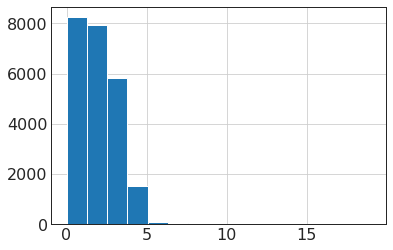

In [ ]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['rooms']).hist(bins=15);

### Посчитайте и добавьте в таблицу новые столбцы

**Цена одногоквадратного метра**

In [ ]:
data['q_metr'] = data['last_price']/data['total_area']
data['q_metr'] = data['q_metr'].astype(int)
data['q_metr'].dtype

dtype('int64')

In [ ]:
print(data['q_metr'].describe())

count     23462.000000
mean      98401.116316
std       42712.114271
min        7962.000000
25%       76500.000000
50%       94886.500000
75%      114006.000000
max      848484.000000
Name: q_metr, dtype: float64


In [ ]:
data.reset_index(inplace=True, drop=True)
display(data['q_metr'].tail(10))

23452    100566
23453    105769
23454    129903
23455     45000
23456     73717
23457     72490
23458     52542
23459     44091
23460    149511
23461     41795
Name: q_metr, dtype: int64

In [ ]:
pd.pivot_table(data,
               index=['living_area', 'total_area', 'last_price'],values=["q_metr"]).sort_values(by='q_metr', ascending = True)

,,,q_metr
living_area,total_area,last_price,
31.00,52.00,500000,9615
40.00,54.00,550000,10185
30.30,43.40,450000,10368
58.00,138.00,1450000,10507
28.00,44.50,470000,10561
...,...,...,...
42.90,67.70,39990000,590694
45.00,65.30,40000000,612557
16.83,38.12,24412900,640422


**Цена кв.метра мин=7962 и макс=848484**

**День недели публикации объявления**

In [ ]:
data['day_p'] = data['first_day_exposition'].dt.weekday
data['mont_p'] = data['first_day_exposition'].dt.month
data['year_p'] = data['first_day_exposition'].dt.year
display(data.sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_n,locality_name_p,q_metr,day_p,mont_p,year_p
11983,7,3820000,58.0,2019-04-08,2,280,9.0,32.00,5,NaN,False,False,13.0,2.0,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Шлиссельбург,Шлиссельбург,65862,0,4,2019
20699,11,4600000,55.0,2017-05-24,3,250,5.0,41.00,2,NaN,False,False,6.0,0.0,Петергоф,36418.0,31607.0,3.0,125.0,3.0,454.0,90.0,Петергоф,Петергоф,83636,2,5,2017
16683,4,6188957,90.2,2016-09-21,3,265,NaN,47.70,14,NaN,False,False,16.7,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,320.0,Санкт-Петербург,Санкт-Петербург,68613,2,9,2016
16414,6,1350000,30.0,2018-05-31,1,270,5.0,17.00,1,False,False,False,6.0,0.0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Кириши,Кириши,45000,3,5,2018
21734,9,3450000,37.5,2018-04-20,1,270,12.0,18.14,7,NaN,False,False,9.8,0.0,посёлок Металлострой,25735.0,27447.0,0.0,NaN,0.0,NaN,105.0,поселок Металлострой,поселок Металлострой,92000,4,4,2018


**Тип этажа квартиры (первый, последний, другой)**

In [ ]:
data['tip_floor'] = np.nan

def floor_index(rew):
    if rew['floor'] == 1:
        return 'первый'
    elif rew['floor'] == rew['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['tip_floor'] = data.apply(floor_index , axis=1)

print(data['tip_floor'].value_counts(dropna=False))

другой       17298
последний     3269
первый        2895
Name: tip_floor, dtype: int64


**Расстояние до центра города в километрах**

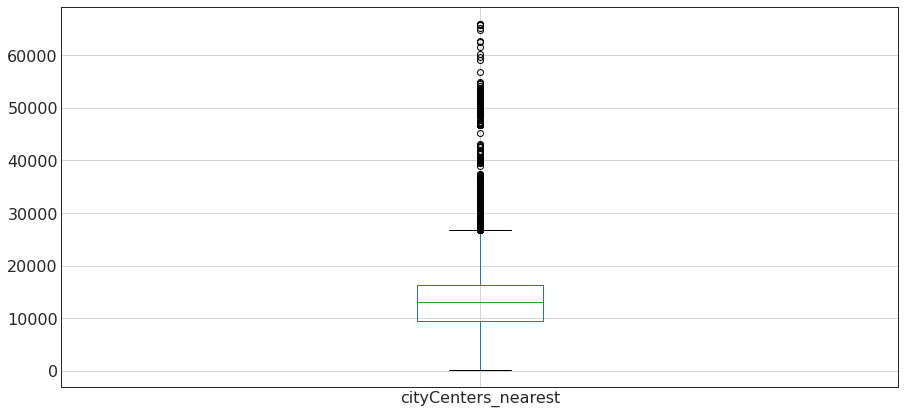

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    26
           ..
12747.0     1
8767.0      1
29890.0     1
9884.0      1
4234.0      1
Name: cityCenters_nearest, Length: 7555, dtype: int64


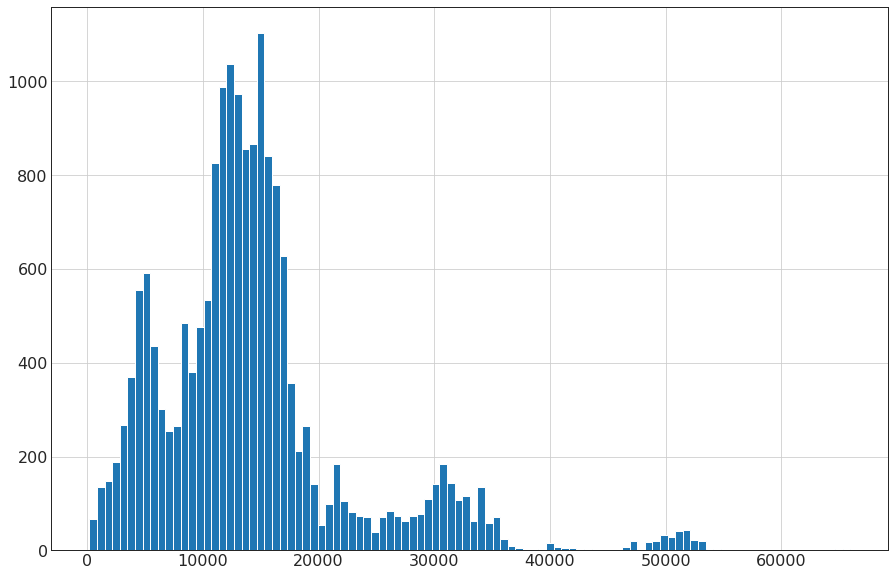

In [ ]:
to_numeric('cityCenters_nearest')
print(data['cityCenters_nearest'].value_counts())

In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [ ]:
print(data['cityCenters_nearest_km'].describe())

count    17950.000000
mean        14.293531
std          8.589423
min          0.181000
25%          9.436000
50%         13.163000
75%         16.334500
max         65.968000
Name: cityCenters_nearest_km, dtype: float64


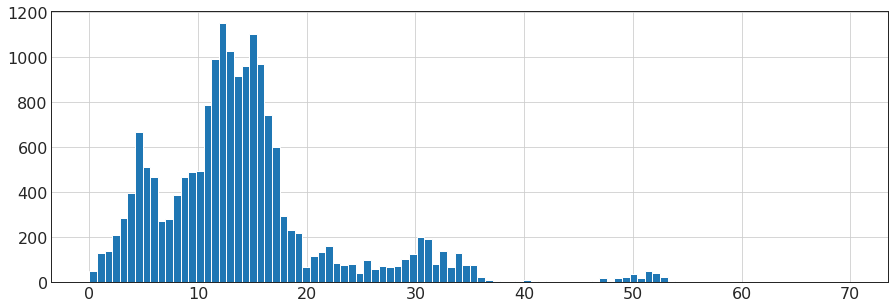

In [ ]:
data['cityCenters_nearest_km'].hist(figsize=(15,5), bins=100, range=(0,70));

**Видим из данных, что мин=0,181км, макс=65,97км**

### Проведите исследовательский анализ данных

**Общая площадь**

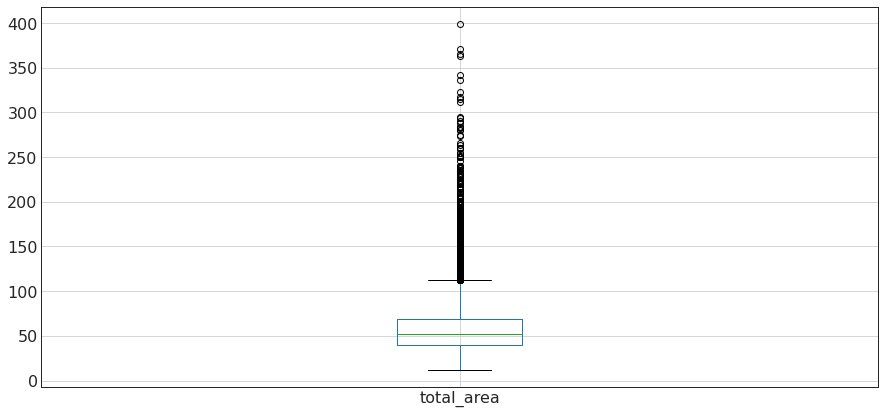

45.00     417
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
15.50       1
127.20      1
49.35       1
116.80      1
55.06       1
Name: total_area, Length: 2061, dtype: int64
count    23462.000000
mean        58.552785
std         28.515675
min         12.000000
25%         40.000000
50%         51.950000
75%         69.000000
max        399.000000
Name: total_area, dtype: float64


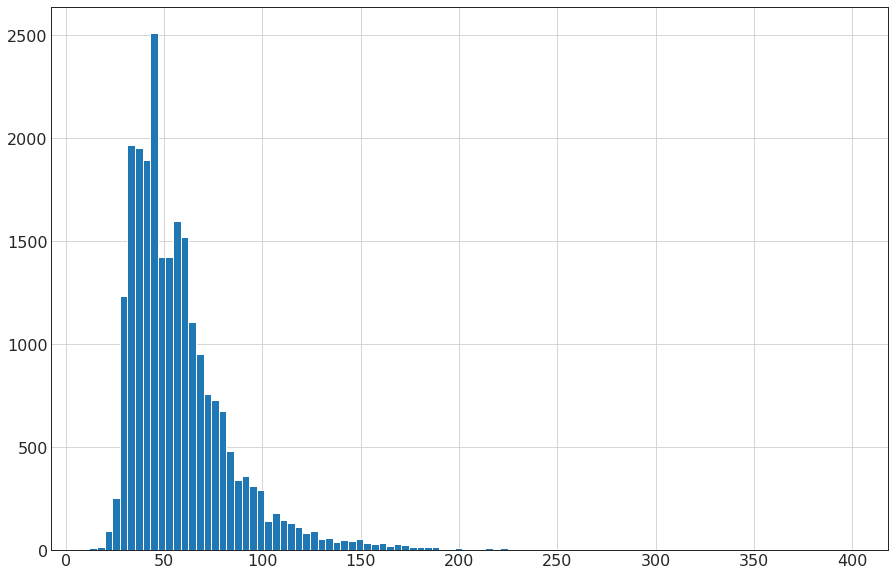

In [ ]:
to_numeric('total_area')
print(data['total_area'].value_counts())
print(data['total_area'].describe())

**мин площадь 12, макс 399 кв.м**

**Жилая площадь**

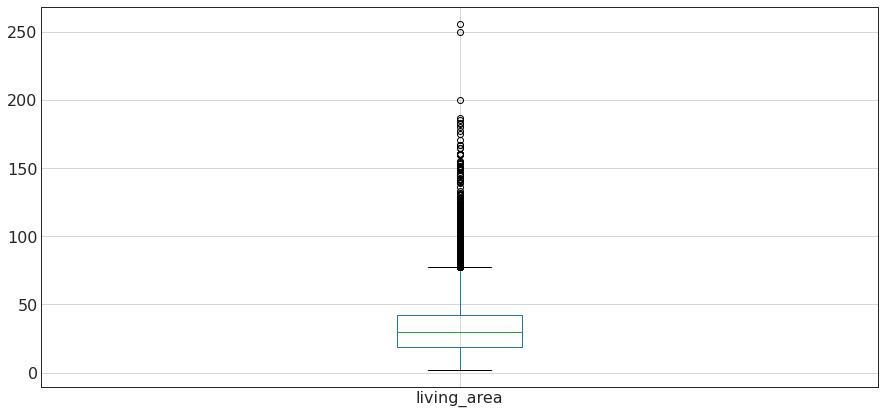

18.000000    882
17.000000    675
30.000000    598
16.000000    486
20.000000    481
            ... 
98.900000      1
32.020000      1
17.030000      1
29.599998      1
16.740000      1
Name: living_area, Length: 1672, dtype: int64
count    21578.000000
mean        33.339686
std         17.927294
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        255.700000
Name: living_area, dtype: float64


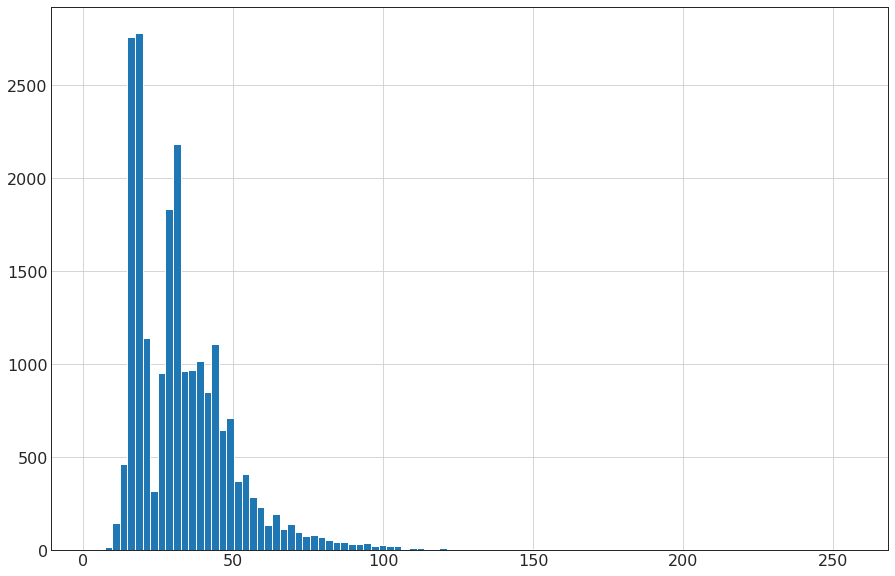

In [ ]:
to_numeric('living_area')
print(data['living_area'].value_counts())
print(data['living_area'].describe())

**мин 2, макс 264.5, скорее всего минимальная площадь не адекватна, такой площади не может быть. Большинство площадей 20-40 кв.м**

In [ ]:
data = data.query('10 < living_area < 500')
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['living_area'].describe())

RangeIndex(start=0, stop=21520, step=1)
count    21520.000000
mean        33.405708
std         17.905886
min         10.080000
25%         18.600000
50%         30.000000
75%         42.000000
max        255.700000
Name: living_area, dtype: float64


**Теперь минимальная жилая площадь 10 кв.м, а макс =264.5**

**Площадь кухни**

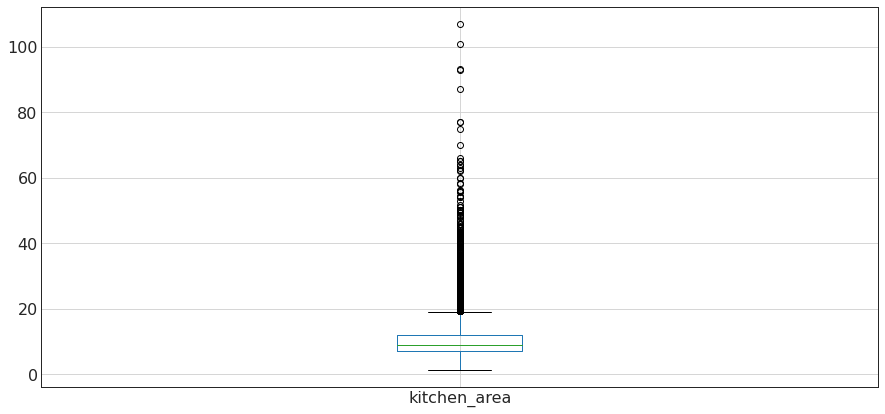

6.00     1273
10.00    1235
8.00     1096
9.00     1078
7.00     1047
         ... 
13.73       1
14.74       1
13.41       1
34.51       1
16.74       1
Name: kitchen_area, Length: 898, dtype: int64
count    20733.000000
mean        10.372546
std          5.508702
min          1.300000
25%          7.000000
50%          9.000000
75%         11.850000
max        107.000000
Name: kitchen_area, dtype: float64


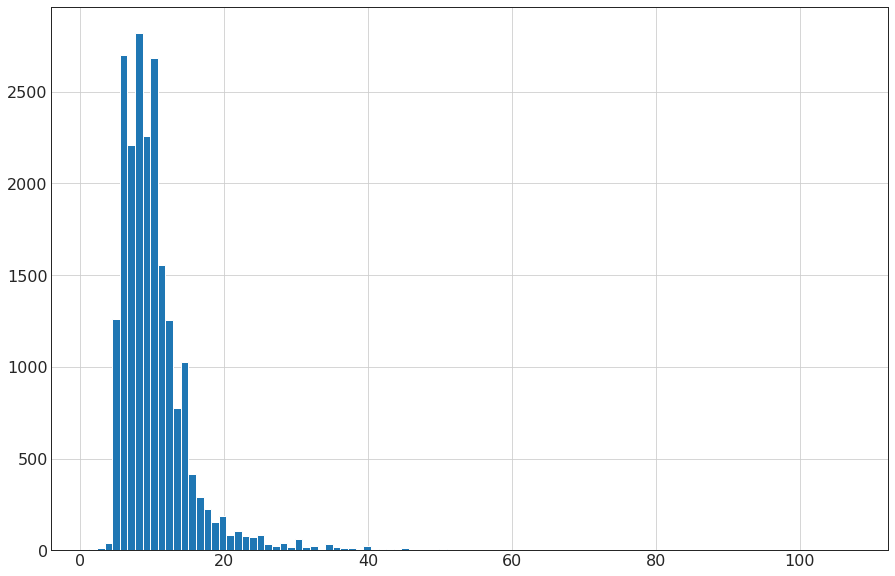

In [ ]:
to_numeric('kitchen_area')
print(data['kitchen_area'].value_counts())
print(data['kitchen_area'].describe())

**мин 1.3, макс 112, скорее всего минимальная площадь не адекватна, такой площади не может быть, максимальная 107 также не адекватна**

In [ ]:
data = data.query('6 < kitchen_area < 110')
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['kitchen_area'].describe())

RangeIndex(start=0, stop=17774, step=1)
count    17774.000000
mean        11.168193
std          5.560619
min          6.020000
25%          8.000000
50%         10.000000
75%         12.100000
max        107.000000
Name: kitchen_area, dtype: float64


**Теперь минимальная площадь кухни 6 кв.м, макисмальная 107**

**Цена объекта**

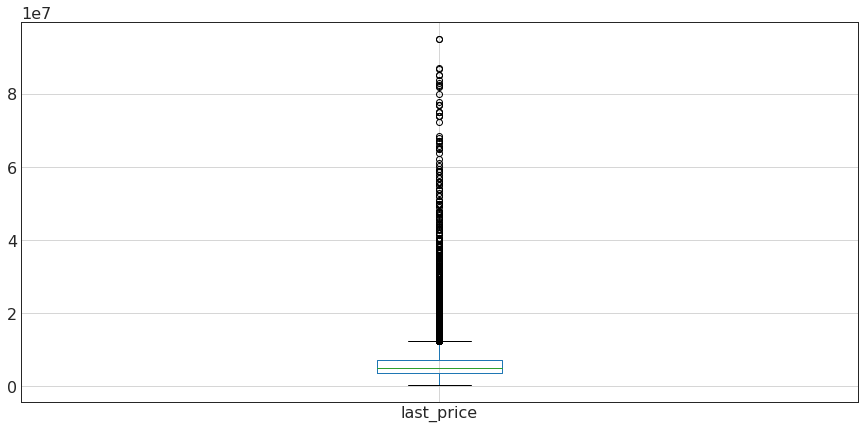

4500000     274
4300000     205
4200000     197
4000000     192
5500000     190
           ... 
3331500       1
66500000      1
4847000       1
9476000       1
21840000      1
Name: last_price, Length: 2410, dtype: int64
count    1.777400e+04
mean     6.551130e+06
std      6.043410e+06
min      4.500000e+05
25%      3.750000e+06
50%      5.000000e+06
75%      7.200000e+06
max      9.500000e+07
Name: last_price, dtype: float64


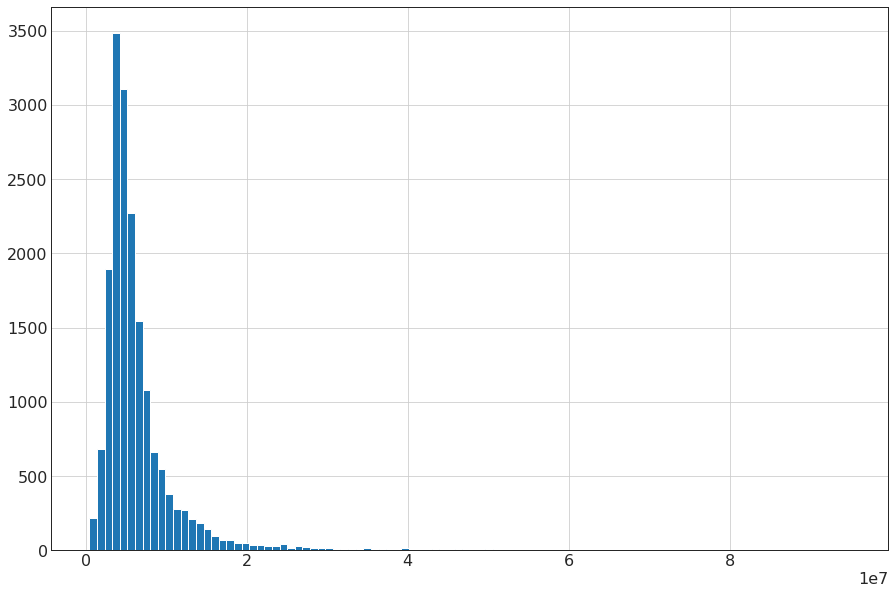

In [ ]:
to_numeric('last_price')
print(data['last_price'].value_counts())
print(data['last_price'].describe())

In [ ]:
pd.pivot_table(data,
               index=['living_area', 'total_area', 'last_price'],values=["q_metr"]).sort_values(by='q_metr', ascending = True)

,,,q_metr
living_area,total_area,last_price,
31.00,52.00,500000,9615
40.00,54.00,550000,10185
58.00,138.00,1450000,10507
28.00,44.50,470000,10561
12.50,78.00,850000,10897
...,...,...,...
42.90,67.70,39990000,590694
45.00,65.30,40000000,612557
16.83,38.12,24412900,640422


**мин 450 000 . Большинство от 1.8 млн до 7млн**

**Количество комнат**

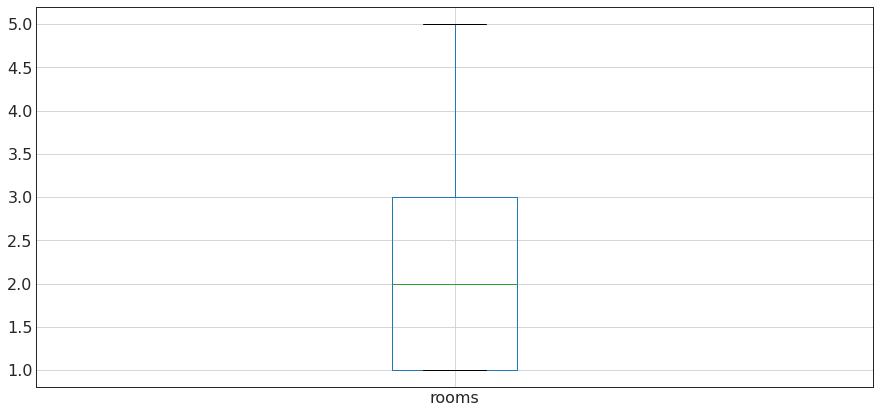

1    6042
2    5912
3    4616
4     937
5     267
Name: rooms, dtype: int64
count    17774.000000
mean         2.070271
std          0.969960
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


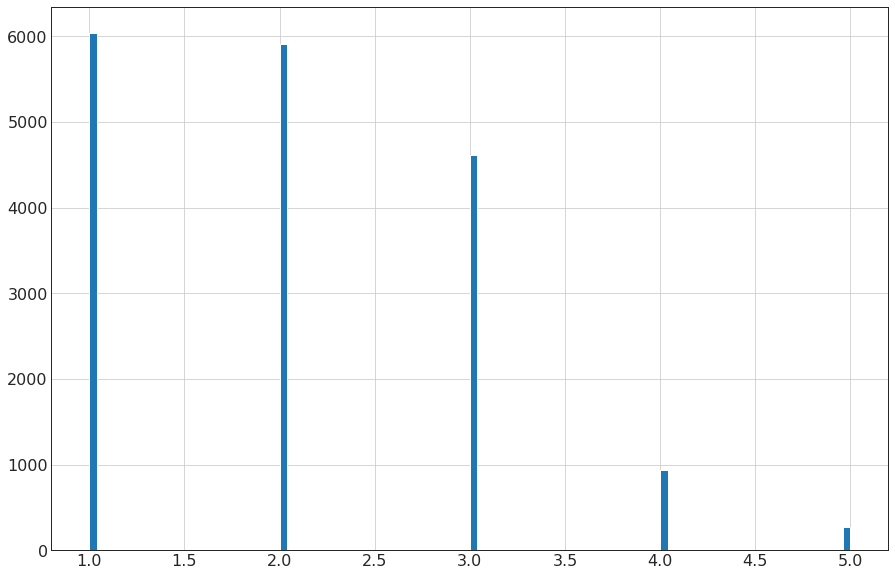

In [ ]:
to_numeric('rooms')
print(data['rooms'].value_counts())
print(data['rooms'].describe())

**Есть квартиры без комнат, скорее студии или свободная планировка. Большинство квартир 1-4 комнат. Самые популярные 1ки-6042, 2ки-5906, 3к также много в районе 4615. Далее кратно снижается количество. Присутствуют от 5-9 комнат их много меньше. Но есть также 10-19**

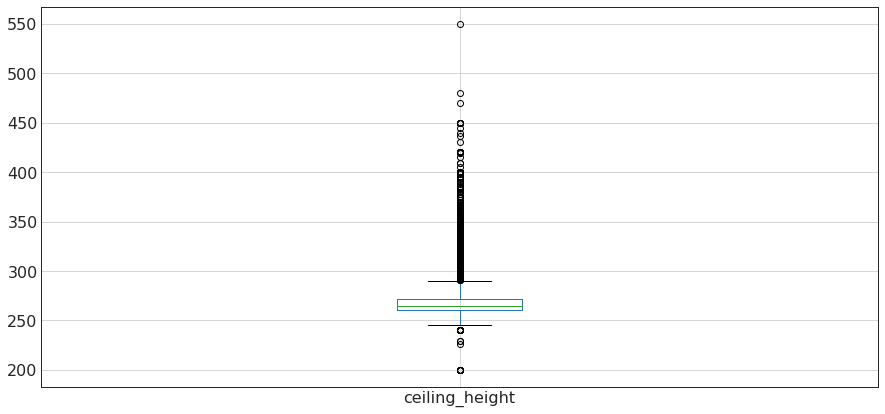

0    270
1    265
2    265
3    303
4    265
5    265
6    265
7    250
8    267
9    265
Name: ceiling_height, dtype: int64
265    7103
250    2203
270    1338
260    1334
300     936
       ... 
480       1
430       1
368       1
398       1
415       1
Name: ceiling_height, Length: 145, dtype: int64
count    17774.000000
mean       270.833858
std         21.899471
min        200.000000
25%        260.000000
50%        265.000000
75%        272.000000
max        550.000000
Name: ceiling_height, dtype: float64


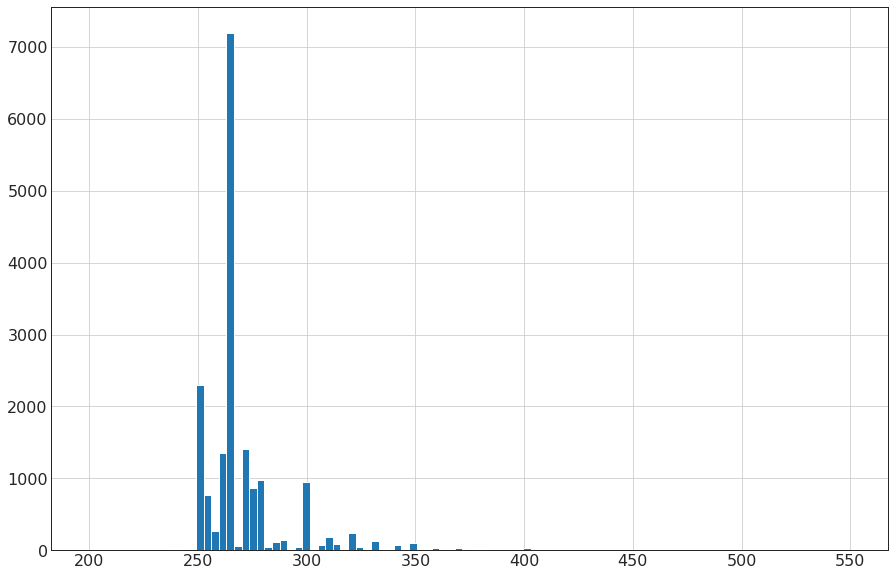

In [ ]:
to_numeric('ceiling_height')
print(data['ceiling_height'].head(10))
print(data['ceiling_height'].value_counts().sort_values(ascending=False))
print(data['ceiling_height'].describe())

**Рзброс высот от 1-100м, как выше детально разбирали высоты, получается, до 1.9м подвалы, выше 4м многоуровневые, 100м нереальная высота потолков. Самые распространенные 2.50-265, другие высоты значительно снижаются. Необходимо учесть, что пропуски привели к 2.65**

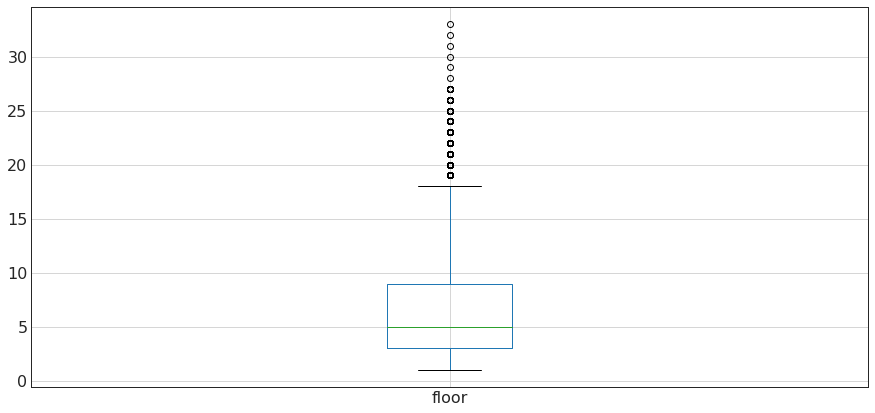

2     2310
3     2203
4     2005
1     1932
5     1823
6     1072
7     1015
8      911
9      891
10     592
12     456
11     454
13     308
14     293
15     282
16     273
17     185
18     149
19     118
21     105
22      96
20      94
23      84
24      53
25      34
26      22
27       8
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64
count    17774.000000
mean         6.274390
std          5.018229
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: floor, dtype: float64


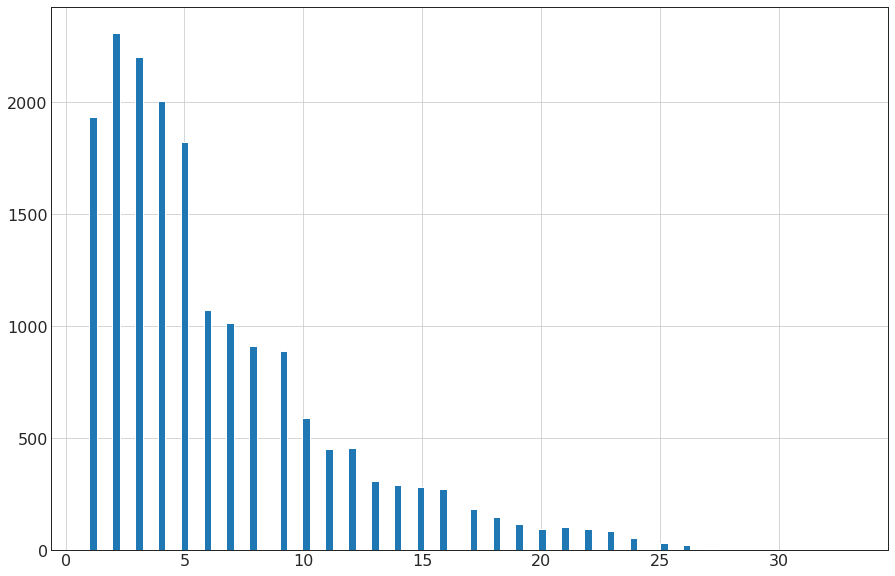

In [ ]:
to_numeric('floor')
print(data['floor'].value_counts().sort_values(ascending=False))
print(data['floor'].describe())

**Разброс этажей от 1-33, большинство от 1-5 этажей, вдвое меньше  с 6-9, с 10 этажа значительно меньше**

**Как зависит цена от того, где находится квартира**

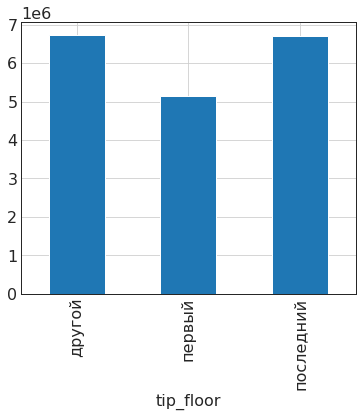

In [ ]:
cat_fl_mean = data.groupby('tip_floor')['last_price'].mean()
cat_fl_mean.plot(x=cat_fl_mean.index, y=cat_fl_mean.values, kind='bar', grid=True, figsize=(6,5));

**Как и ожидалось спрос на 1й этаж менее всего.**

**Расстояние до центра в метрах**

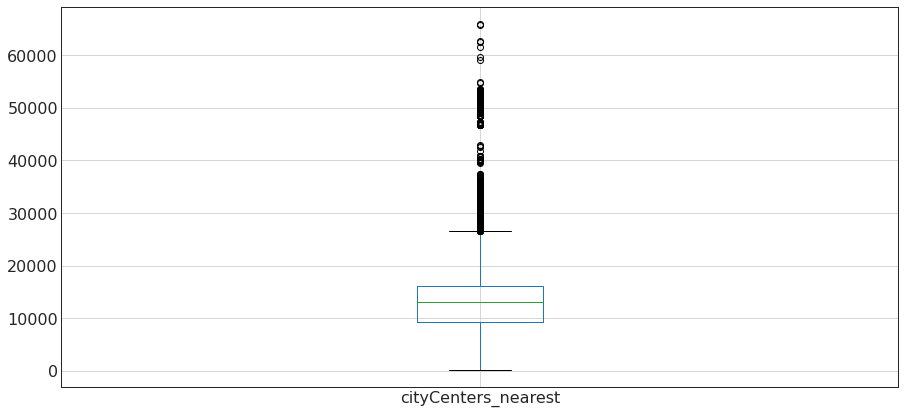

8460.0     55
8434.0     27
10720.0    26
20444.0    23
10364.0    23
           ..
12746.0     1
33626.0     1
29018.0     1
4418.0      1
4234.0      1
Name: cityCenters_nearest, Length: 6234, dtype: int64
count    14107.000000
mean     13893.370667
std       8136.677518
min        181.000000
25%       9186.500000
50%      13145.000000
75%      16134.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64


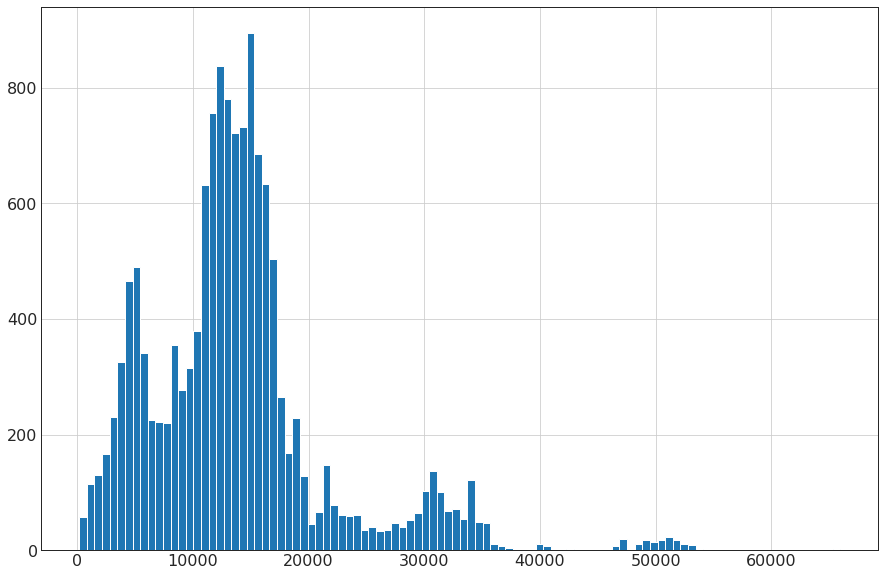

In [ ]:
to_numeric('cityCenters_nearest')
print(data['cityCenters_nearest'].value_counts().sort_values(ascending=False))
print(data['cityCenters_nearest'].describe())

**Как видно, большинство находится от 1-18км.**

**Расстояние до ближайшего аэропорта**

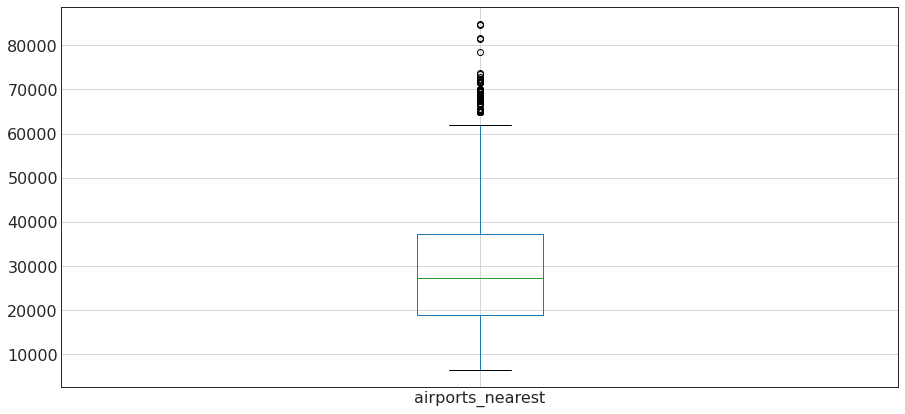

37434.0    55
37407.0    27
21928.0    27
39946.0    26
18732.0    23
           ..
53902.0     1
22797.0     1
17352.0     1
46469.0     1
20875.0     1
Name: airports_nearest, Length: 6667, dtype: int64
count    14091.000000
mean     29078.701583
std      12451.610634
min       6450.000000
25%      18904.000000
50%      27164.000000
75%      37227.000000
max      84853.000000
Name: airports_nearest, dtype: float64


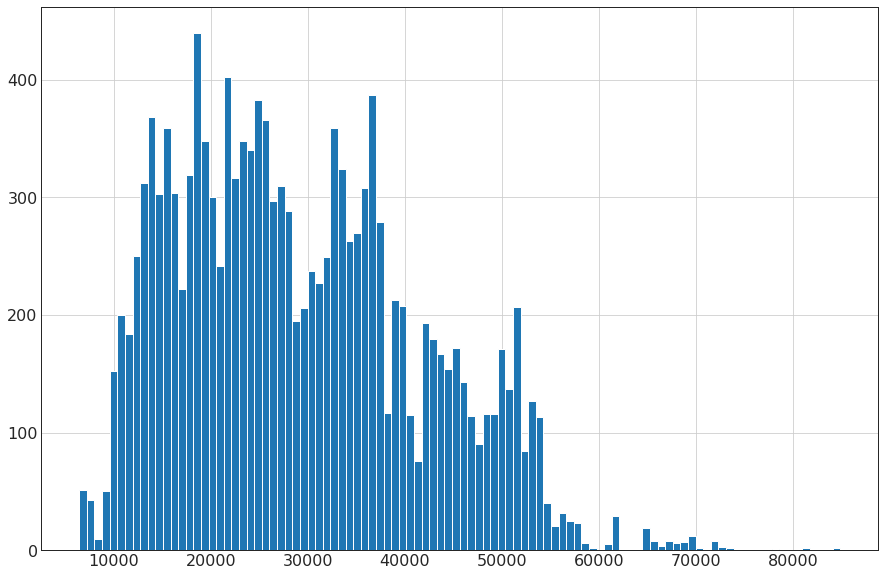

In [ ]:
to_numeric('airports_nearest')
print(data['airports_nearest'].value_counts().sort_values(ascending=False))
print(data['airports_nearest'].describe())

**Расстояние до аэропорта с 6,45-84,9 км**

**Расстояние до ближайшего парка**

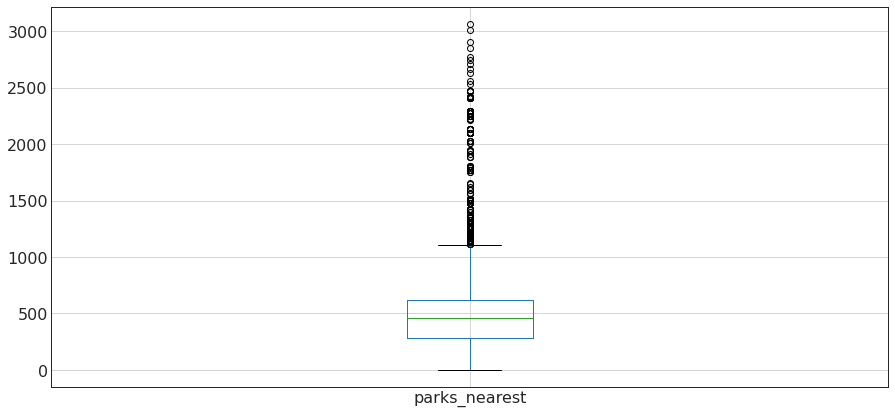

441.0    59
456.0    38
173.0    32
392.0    29
471.0    27
         ..
69.0      1
903.0     1
822.0     1
859.0     1
933.0     1
Name: parks_nearest, Length: 939, dtype: int64
count    6179.000000
mean      491.347953
std       341.832867
min         1.000000
25%       287.000000
50%       456.000000
75%       617.000000
max      3064.000000
Name: parks_nearest, dtype: float64


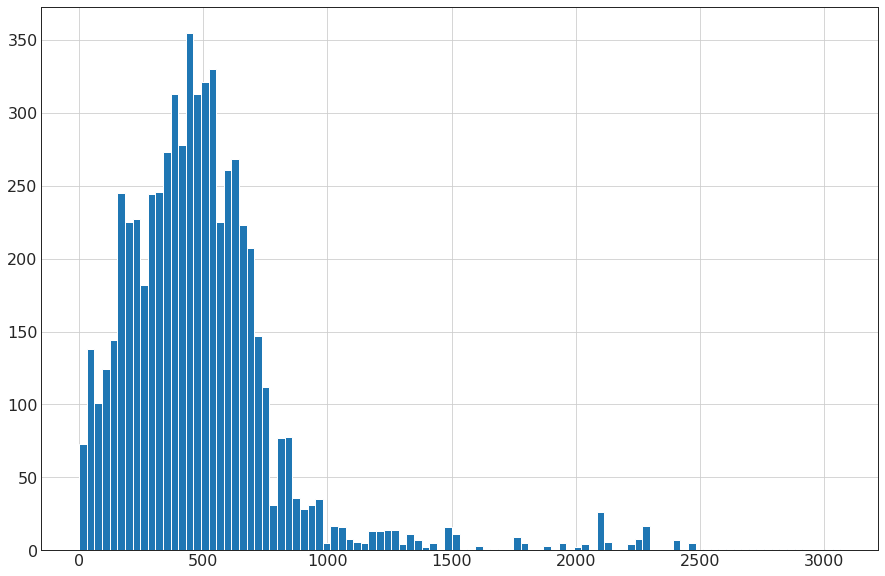

In [ ]:
to_numeric('parks_nearest')
print(data['parks_nearest'].value_counts().sort_values(ascending=False))
print(data['parks_nearest'].describe())

**Расстояние до парка от 1м-3км**

**День и месяц публикации объявлений**

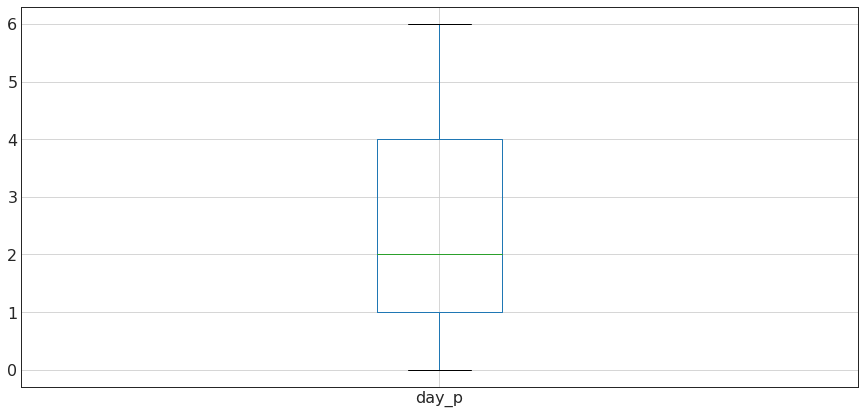

3    3239
1    3178
2    2981
4    2976
0    2756
5    1410
6    1234
Name: day_p, dtype: int64
count    17774.000000
mean         2.543884
std          1.783305
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: day_p, dtype: float64


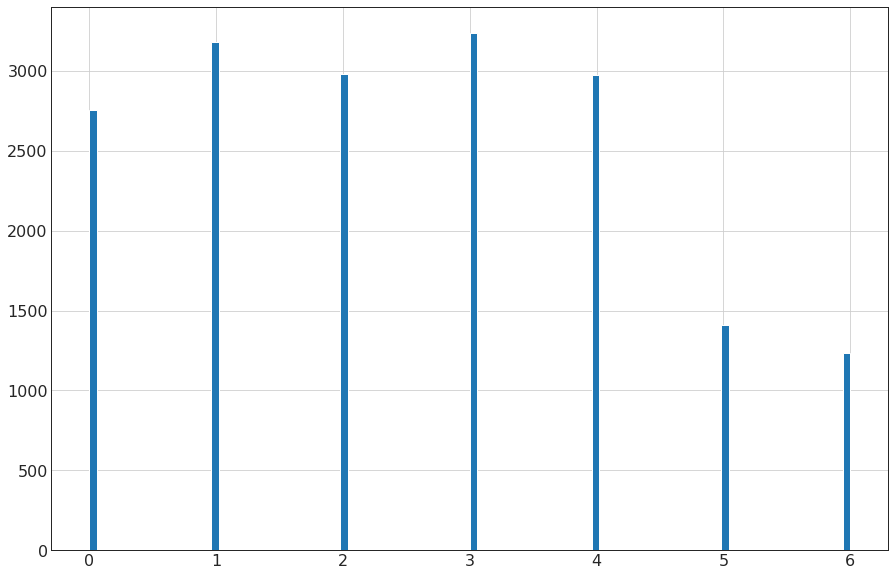

In [ ]:
to_numeric('day_p')
print(data['day_p'].value_counts().sort_values(ascending=False))
print(data['day_p'].describe())

**Меньше всего в пт и сб, Больше всго в среду**

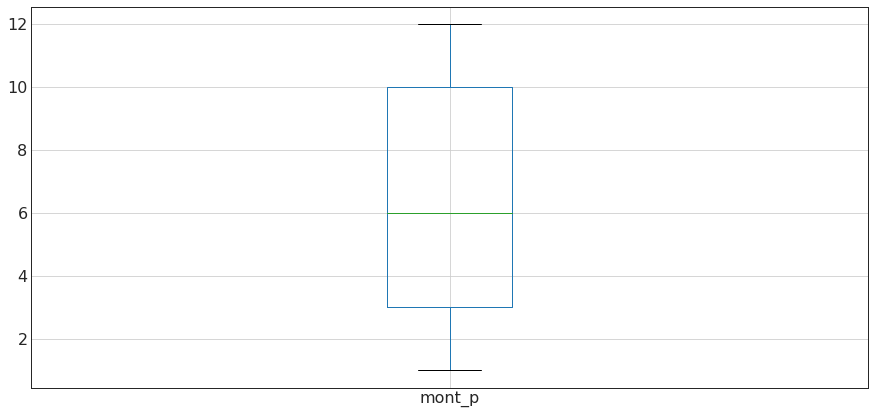

2     1936
3     1882
11    1849
4     1784
10    1627
9     1593
8     1318
6     1316
7     1271
12    1149
1     1074
5      975
Name: mont_p, dtype: int64
count    17774.000000
mean         6.451784
std          3.467934
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: mont_p, dtype: float64


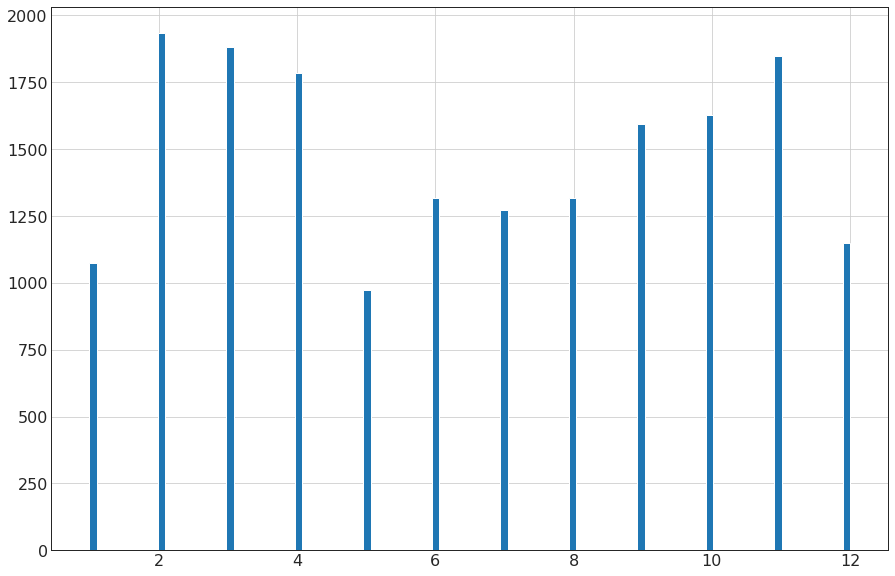

In [ ]:
to_numeric('mont_p')
print(data['mont_p'].value_counts().sort_values(ascending=False))
print(data['mont_p'].describe())

**Самые активные месяцы 2,3,4,9,10,11**

**как быстро продавались квартиры (столбец days_exposition)**

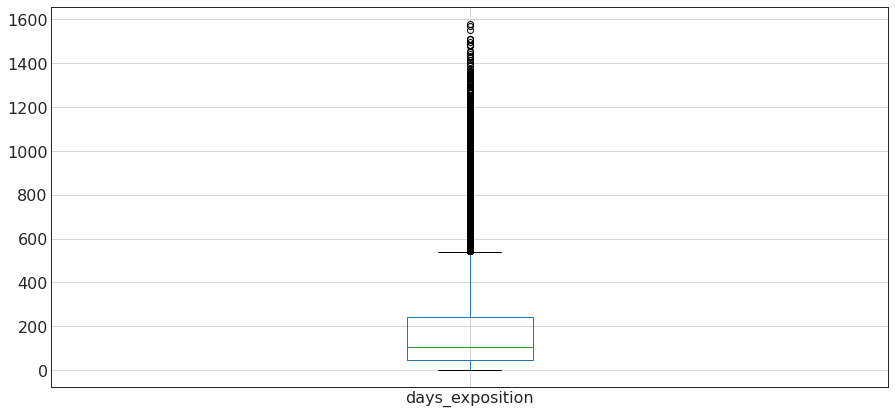

45.0      415
60.0      316
7.0       175
30.0      168
4.0       132
         ... 
1225.0      1
1231.0      1
1434.0      1
837.0       1
1174.0      1
Name: days_exposition, Length: 1080, dtype: int64
count    15348.000000
mean       187.796325
std        224.235900
min          1.000000
25%         45.000000
50%        103.000000
75%        243.000000
max       1580.000000
Name: days_exposition, dtype: float64


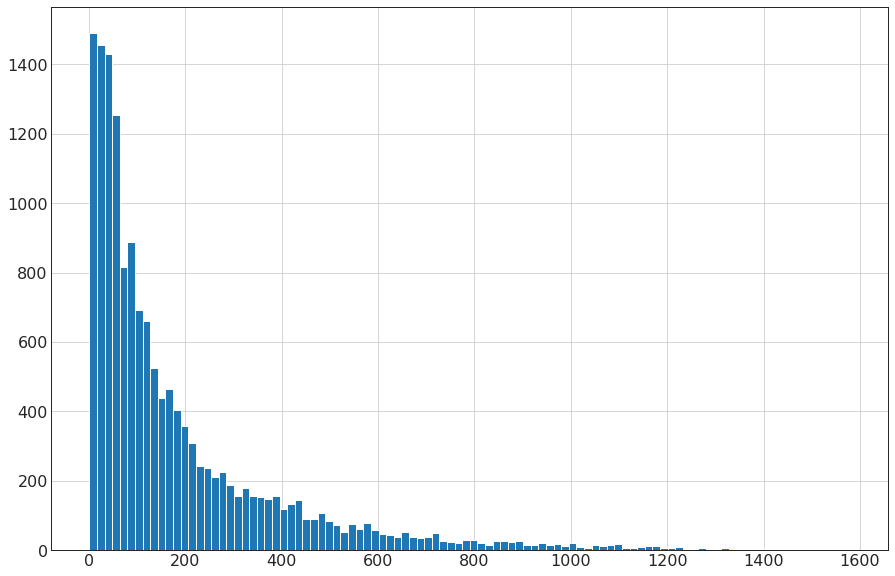

In [ ]:
to_numeric('days_exposition')
print(data['days_exposition'].value_counts().sort_values(ascending=False))
print(data['days_exposition'].describe())

**Основные продажи в пределах 3-6 мес. Всё что продается ранбше от 45 дней можно считать быстрыми, более 180 долгими** 

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

**зависимость цены от - общей площади**

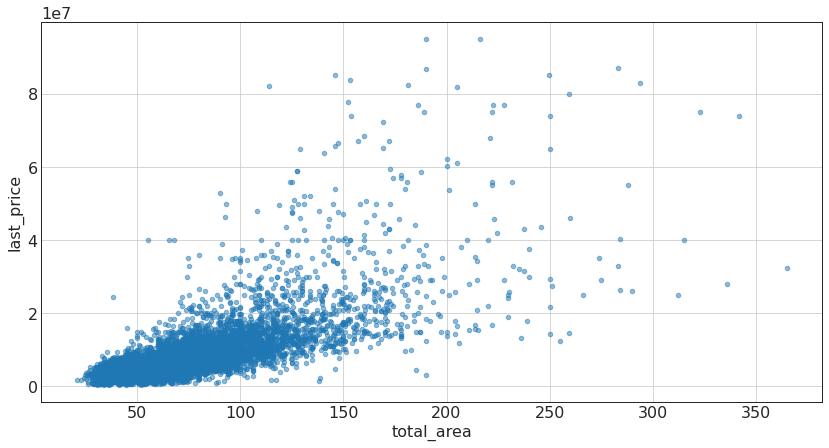

In [ ]:
def rew(column):
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);

rew('total_area')

**Зависимость есть, но не сильно влияет, увеличивается площадь - растёт цена**

**зависимость цены от - жилой площади**

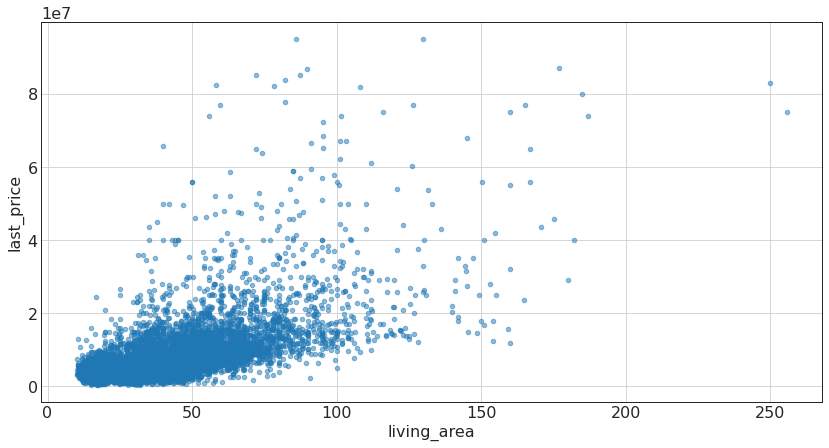

In [ ]:
rew('living_area')

**Так же присутствует зависимость, как и с общей площадью, но она не ярко выражена**

**зависимость цены от - площади кухни**

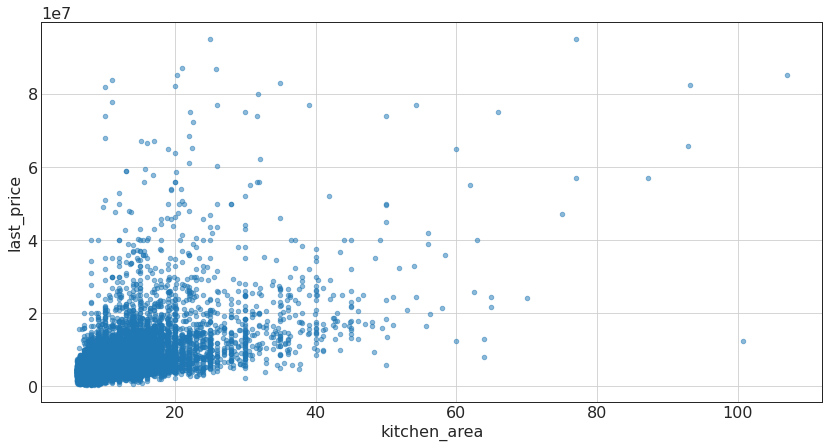

In [ ]:
rew('kitchen_area')

**Есть небольшая зависимость от площади кухни**

**зависимость цены от - количества комнат**

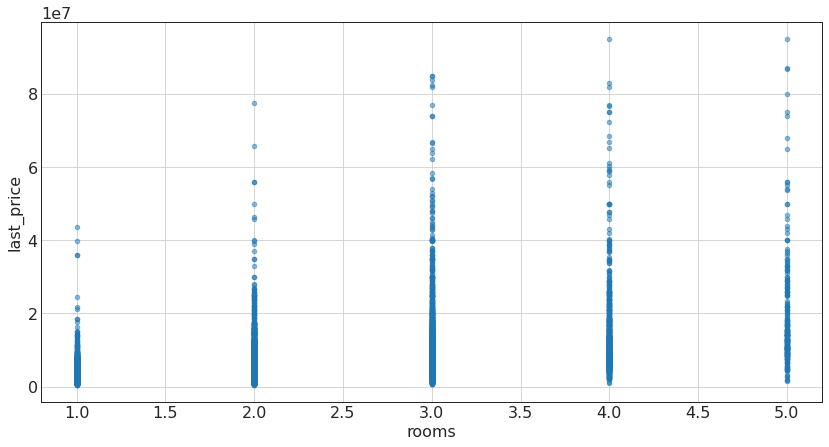

In [ ]:
rew('rooms')

**Не сильно прослеживается зависимость от количества комнат, растёт количесвто, дорожает квартира**

**зависимость цены от - типа этажа, на котором расположена квартира (первый, последний, другой)**

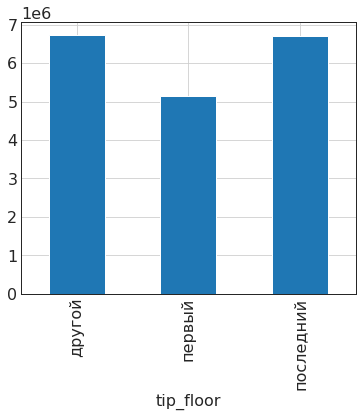

In [ ]:
pr_floor_i = data.groupby('tip_floor')['last_price'].mean()
pr_floor_i.plot(kind='bar', grid=True, figsize=(6,5));

**Как видно из графика первый этаж менее популярный и цена ниже.**

**зависимость цены от - даты размещения (день недели, месяц, год)**

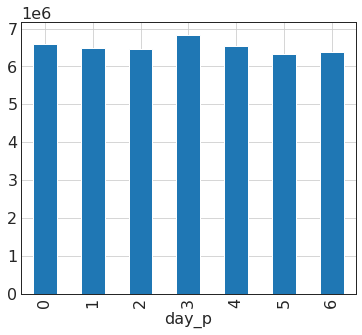

In [ ]:
pr_floor_i = data.groupby('day_p')['last_price'].mean()
pr_floor_i.plot(kind='bar', grid=True, figsize=(6,5));

**Не видно зависимости от дня**

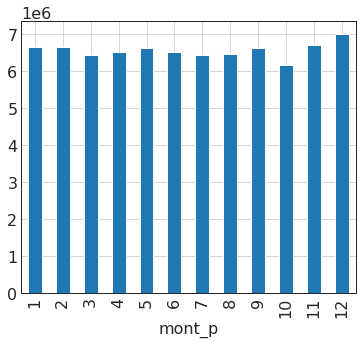

In [ ]:
pr_floor_i = data.groupby('mont_p')['last_price'].mean()
pr_floor_i.plot(kind='bar', grid=True, figsize=(6,5));

**Практически нет зависимости от месяца**

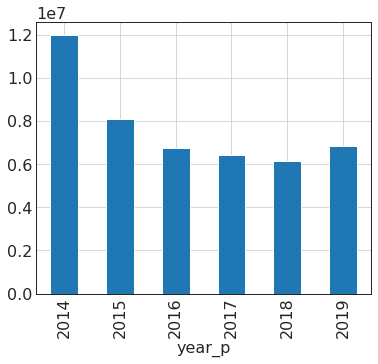

In [ ]:
pr_floor_i = data.groupby('year_p')['last_price'].mean()
pr_floor_i.plot(kind='bar', grid=True, figsize=(6,5));

**2014 год оказался самым высоким и судя по всему, по инерции и 2015 захватил. А также в 2019 опять начался небольшой рост**

**Не видно зависимости от дня, недели. По годам есть явное отличие**

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [ ]:
mest10 = data.groupby('locality_name')['q_metr'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
mest10.columns = ['flats', 'q_metr_price']
mest10.reset_index(inplace=True)

print(mest10)
print()
print()
print('Итог:')

print('НП с cамой высокой стоимостю')
print(mest10.loc[mest10['q_metr_price']==mest10['q_metr_price'].max()])
print()
print()
print('НП с cамой низкой стоимостю')
print(mest10.loc[mest10['q_metr_price']==mest10['q_metr_price'].min()])

       locality_name  flats   q_metr_price
0    Санкт-Петербург  12357  114394.519058
1     посёлок Мурино    394   85074.119289
2     посёлок Шушары    373   78483.410188
3         Всеволожск    329   69741.887538
4  посёлок Парголово    280   90766.610714
5            Колпино    250   75587.732000
6             Пушкин    238  106488.134454
7    деревня Кудрово    224   92182.383929
8            Гатчина    183   69755.393443
9            Кудрово    149   99361.026846


Итог:
НП с cамой высокой стоимостю
     locality_name  flats   q_metr_price
0  Санкт-Петербург  12357  114394.519058


НП с cамой низкой стоимостю
  locality_name  flats  q_metr_price
3    Всеволожск    329  69741.887538


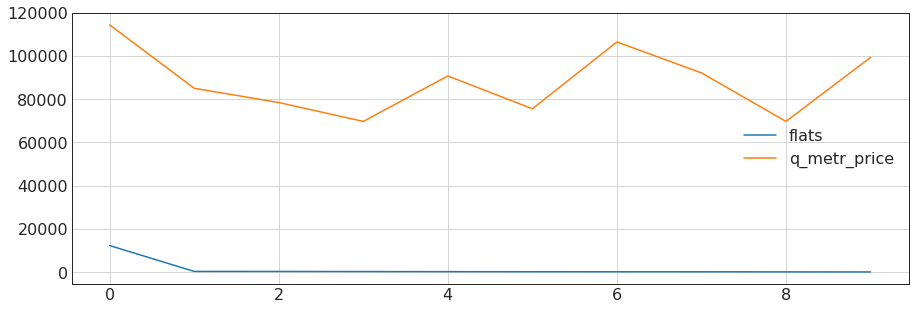

In [ ]:
mest10.plot(grid=True, figsize=(15,5));

**Средняя цена в Санкт-Петербурге = 114394 руб. за кв.м, Самая низкая Всеволжск = 69741,88 руб. кв.м**

**Cредняя цена каждого километра**

In [ ]:
data['cityCenters_nearest'].describe()

count    14107.000000
mean     13893.370667
std       8136.677518
min        181.000000
25%       9186.500000
50%      13145.000000
75%      16134.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

In [ ]:
spb = data.loc[data['locality_name']=='Санкт-Петербург',['last_price', 'cityCenters_nearest']].reset_index(drop=True)
spb['rast_center_km'] = round(spb['cityCenters_nearest']/1000)
print(spb.sample(10))

       last_price  cityCenters_nearest  rast_center_km
8997      3990000              11853.0            12.0
4413      7445866              15564.0            16.0
10242     3800000              14289.0            14.0
632       7300000              11936.0            12.0
10835     6900000              13251.0            13.0
2783      6600000               3907.0             4.0
1335      9490000               5494.0             5.0
5868      4670000               9632.0            10.0
8547     19173000              10364.0            10.0
10107     5350000              13255.0            13.0


In [ ]:
st_km_spb = spb.pivot_table(index='rast_center_km', values='last_price', aggfunc='mean')
st_km_spb.head(10)

,last_price
rast_center_km,
0.0,2.767267e+07
1.0,1.515439e+07
2.0,1.446257e+07
3.0,1.035512e+07
4.0,1.104646e+07
5.0,1.220012e+07
6.0,1.320405e+07
7.0,1.382827e+07
8.0,9.995243e+06


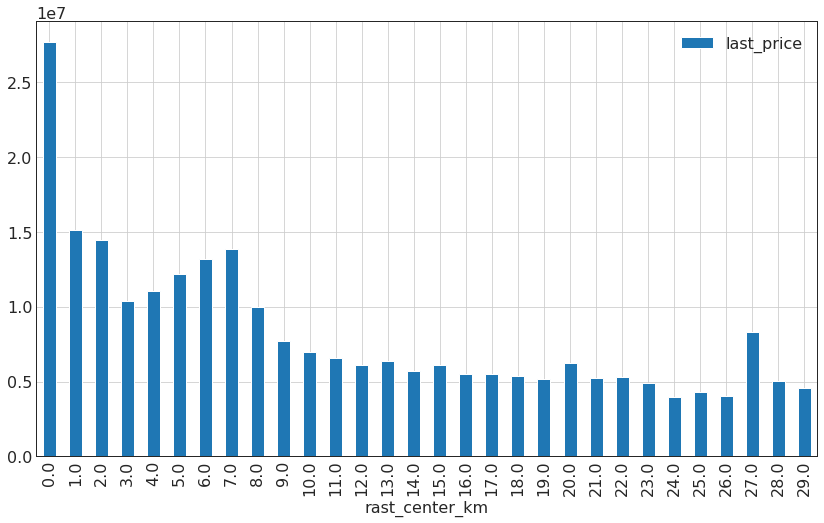

In [ ]:
st_km_spb.plot(kind='bar', grid=True, figsize=(14,8));

**Максимальная цена до 1км, с 1-7 км также высокая, далее кратное снижение**

***Вывод:***
* Зависимость цены от - общей площади есть, но не сильно влияет, увеличивается площадь - растёт цена
* Присутствует зависимость от жилой площади, но она не ярко выражена
* Есть небольшая зависимость от площади кухни
* Не сильно прослеживается зависимость от количества комнат, растёт количесвто, дорожает квартира
* Как видно из графика первый этаж менее популярный и цена ниже
* Нет зависимости цены от дня, недели, года

***Общий вывод:***
**Провели исследование о продаже квартир**
* обработали данные
* в last_price удалили нереально низкие и высокие цены
* в total_area удалили очень большимие площади  
* в ceiling_height было много пропусков, заполнили медианой, удалили нереально большие и слишком низкие высоты
* в балконах было много пропусков, видимо их просто нет, заполнили = 0
* в locality_name заменили ё на е, произвели замену поселок на поселок городского типа
* вывели стоимость 1го квадратного метра
* добавили 7 новых столбцов
* построили гистограммы
* в living_area удалили очень малые жилые площади 
* в kitchen_area удалили очень малые площади кухни
* Удалим нереальные столбцы
* Меньше всего объявленийв пт и сб, Больше всго в среду
* Основные продажи в пределах 3-6 мес. Всё что продается ранбше от 45 дней можно считать быстрыми, более 180 долгими


**Как видно, большинство квартир находится от 1-18км от центра.**
**Разброс этажей от 1-33, большинство от 1-5 этажей, вдвое меньше  с 6-9, с 10 этажа значительно меньше**
**Самые популярные 1ки-6042, 2ки-5906 с площадями 30-50кв.м.и высотой 2.50-3.00м. Есть квартиры без комнат, скорее студии или свободная планировка. Большинство квартир 1-4 комнат.
Большинство продаётся поцене 1,8-7 млн. руб. Большинство домов это 1-5 этажей, кратно меньше с 6-9.**
**Расстояние до аэропорта с 6,45-84,9 км**


**2014 год оказался самым высоким и судя по всему, по инерции и 2015 захватил. А также в 2019 опять начался небольшой рост**

***Больше всего на стоимость влияет площадь, удаление от центра и количество комнат, а также 
незначительно площадь кухни. Снижает стоимость , если квартира на первом этаже.Самая высокая цена от 0-1км.
Снижается достаточно сильно.***

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод